
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> The "No-show appointments" was the dataset chosen to work on for this project. It is a collection of 100K medical appointments in Brazil and is focused on whether or not patients show up for their appointments. Each row has a number of characteristics of the patients.

In [4]:
# Importing the libraries needed
import numpy as np
import pandas as pd
import datetime
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Uploading the csv file and displaying the first 5 rows
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The questions I plan on exploring for this project are:
> 1) Which neighbourhoods had the highest number of patients showing up?

> 2) Which ages had the highest number of patients who did not show up?

> 3) Does receiving an SMS make it more likely for the patient to show up?

> 4) Which neighbourhood and gender were more likely to show up?

> 5) Are there any correlations between having a Scholarship, Hipertension, Diabetes, Alcoholism or Handcap?

## Data Wrangling


### General Properties

In [5]:
#Checking the datatypes of each column and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Based on the above code, there is no missing data in this dataset.

To make the data more clean, the following changes should be made:

Change PatiendId to int

Change ScheduledDay and AppointmentDay to datetime

No-show could be changed to values of 0 to 1 (0 if they didn't show and 1 if they showed)


In [6]:
#Checking the statistics of the variables
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Based on the code above, there is an age of -1, which should be inspected. 

Furthermore, the maximum in Handcap is 4, but should be only 1.

In [7]:
#Checking the unique values of the variables
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Based on the above code, there are some patients that made more than one appointment.

Handcap should have only two unique values: 0 and 1.


### Data Cleaning

In [8]:
#Creating a duplicate of the dataset
df_clean = df.copy()

In [10]:
#Defining:
#Changing PatientId from float to int

In [11]:
#Coding:
df_clean.PatientId = df_clean.PatientId.astype(int)

In [12]:
#Testing:
df_clean.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

After re-examining the datatypes, the PatientId was changed to int.

In [ ]:
#Defining:
#Changing ScheduledDay and AppointmentDay to datetime

In [13]:
#Coding:
df_clean.ScheduledDay = pd.to_datetime(df_clean.ScheduledDay)
df_clean.AppointmentDay = pd.to_datetime(df_clean.AppointmentDay)

In [14]:
#Testing:
df_clean.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

After checking the datatypes, the Scheduled Day and Appointment Day were both changed to datetime.

In [ ]:
#Defining:
#Changing the No-show column from 'Yes' and 'No' to 0s and 1s
#'No' will be changed to 1 because it means that the patient showed up

In [15]:
#Coding:
df_clean['No-show'] = df_clean['No-show'].replace('No', 1)
df_clean['No-show'] = df_clean['No-show'].replace('Yes', 0)

In [16]:
#Testing:
df_clean['No-show'].value_counts()

1    88208
0    22319
Name: No-show, dtype: int64

The above test shows that 88,208 patients showed up to their appointments and 22,319 didn't.

In [ ]:
#Defining:
#Checking to see the negative age values

In [17]:
#Coding:
df_clean[df_clean.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


Since there is only one row of data with a negative age, it was decided to drop this row from the dataset.

In [18]:
df_clean = df_clean[df_clean.Age != -1]

In [19]:
#Testing:
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


It can now be seen that the minimum age is 0.

In [20]:
#Defining:
#Checking the Handcap values that are greater than 1

In [21]:
#Coding:
df_clean[df_clean.Handcap > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,72825819926211,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,1
1665,12429193284112,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,1
1666,12429193284112,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2071,12429193284112,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2091,14918292313383,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,1
109484,358949459162675,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,1
109733,566297621534644,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,1
109975,45221851115953,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,1


There are 199 rows with values of Handcap that's greater than 1. It was decided to change any value greater than 1 to 1.

In [22]:
df_clean[df_clean.Handcap > 1] = 1

In [23]:
#Testing:
df_clean[df_clean.Handcap > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now the Handcap column contains a value of either 0 or 1.

In [24]:
#Defining:
#Now it is time to remove the unwanted columns:PatientId, AppointmentID, ScheduledDay and AppointmentDay

In [25]:
#Coding:
df_clean = df_clean.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)

In [26]:
#Testing:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


The data cleaning process is now done.

## Exploratory Data Analysis



In [54]:
#First, a function is created to plot the similar charts

#val1: the variable to group by
#val2: the variable to count
#k: the chart type
#t: the chart's title
#asc: whether ascending is True or False

def plot_chart(val1, val2, k, t, asc):
    plot_1 = df_clean.groupby(val1)[val2].value_counts().sort_values(ascending=asc)
    plot_1[:10].plot(kind=k, title=t)
    plt.xlabel(val1)
    plt.ylabel(val2 + ' count');

### Research Question 1: Which neighbourhoods had the highest number of patients showing up?

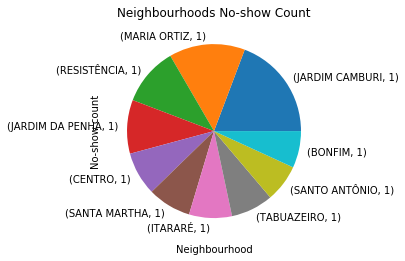

In [59]:
plot_chart('Neighbourhood','No-show', 'pie', 'Neighbourhoods No-show Count', False)

Based on the pie chart above, these were the 10 neighbourhoods with the highest number of patients who showed up. JARDIM CAMBURI was the neighbourhood with the highest value.

### Research Question 2 : Which ages had the highest number of patients who did not show up?

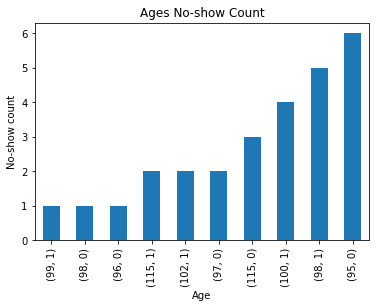

In [56]:
plot_chart('Age','No-show', 'bar', 'Ages No-show Count', True)

The above bar chart shows the 10 ages with the highest number of patients who skipped their appointments. The age with the most skipped appointments was 99.

### Research Question 3: Does receiving an SMS make it more likely for the patient to show up?

In [30]:
#Create a new column that will provide the following:
#If the value = 0, that means the SMS was not received and the patient did not show up.
#If the value = 1, that means that the SMS was not received and the patient showed up.
#If the value = 2, that means that the SMS was received and the patient did not show up.
#If the value = 3, that means that the SMS was received and the patient showed up.
df_clean['SMS_Noshow'] = df_clean['SMS_received']*2 + df_clean['No-show']

In [31]:
df_clean.SMS_Noshow.value_counts()

1    62389
3    25859
0    12503
2     9775
Name: SMS_Noshow, dtype: int64

Based on the above data, most patients showed up even without receiving an SMS. This could mean that there is no correlation between receiving an SMS and showing up.

### Research Question 4 : Which neighbourhood and gender were more likely to show up?

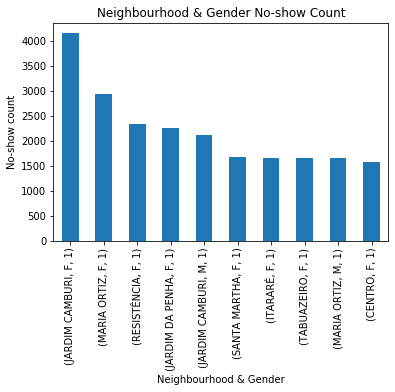

In [57]:
plot_chart(['Neighbourhood', 'Gender'],'No-show', 'bar', 'Neighbourhood & Gender No-show Count', False)
plt.xlabel('Neighbourhood & Gender');

Based on the bar chart above, the majority of the patients who showed up were females, and the neighbourhood and gender who showed up the most were females in JARDIM CAMBURI.

### Research Question 5: Are there any correlations between having a Scholarship, Hipertension, Diabetes, Alcoholism or Handcap?

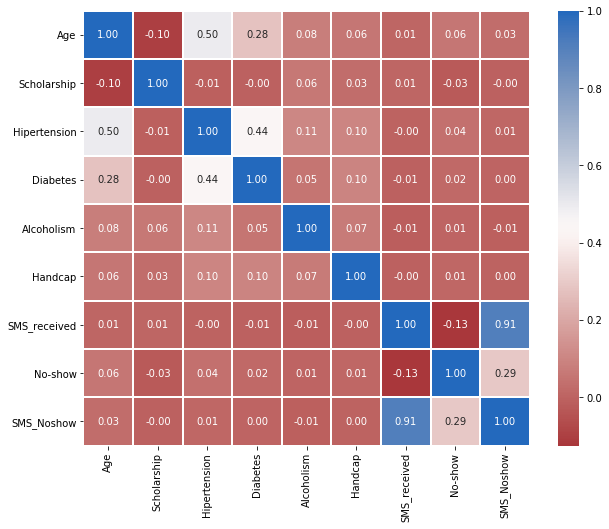

In [53]:
corr_matrix = df_clean.corr()
plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt = '.2f', cmap = 'vlag_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Based on the correlation plot above, there seems to be a correlation between hipertension and age, as well as a correlation between diabetes and hipertension.

<a id='conclusions'></a>
## Conclusions

The limitations of this project included that there weren't many correlations between the variables, and that none of the variables could predict whether a patient would show up for their appointment or not. 

This dataset yielded interesting results. The first research question showed the neighbourhoods with the highest number of patients who showed up. However, this does not mean that if a patient is from these neighbourhoods that there is a higher chance of them of showing up. It could also be due to having more patients than other neighbourhoods.

As for the second research question, it showed that the majority of patients who did not show up were the elderly. This could be due to several reasons, such as them passing away, or forgetting their appointments, for example.

The third research question showed that there is no correlation between receiving an SMS and showing up to the appointment.

Finally, the final research question showed that the gender that showed up more to their appointments were female. But then again, this does not necessarily mean that females show up more than males.

In conclusion, more data is needed to reach more accurate conclusions.